C:\Users\Mer\AppData\Local\Temp\ipykernel_6668\3761523249.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


Data loaded successfully!


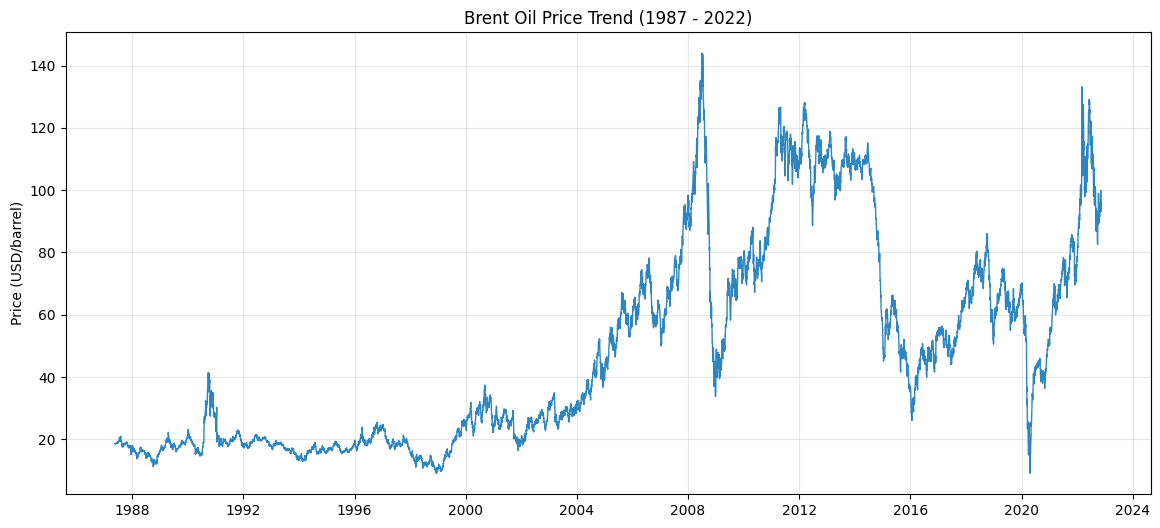

--- Stationarity Test (ADF) ---
ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
Result: Non-Stationary (Structural breaks likely present)


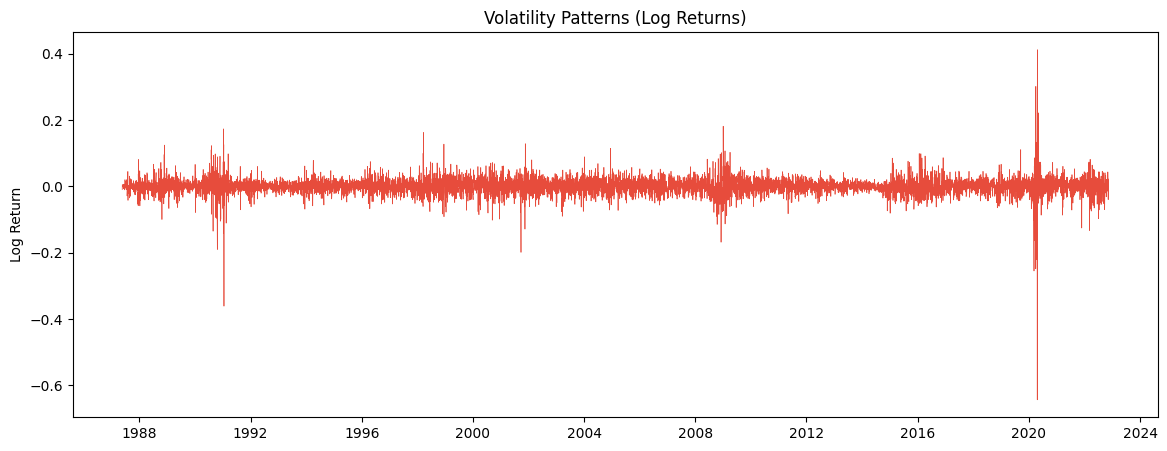

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# 1. Load the data
try:
    # Adjust path if your filename varies (e.g., 'BrentOilPrices.csv')
    df = pd.read_csv('../data/raw/BrentOilPrices.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error: {e}")

# 2. Trend Analysis [cite: 75, 91]
plt.figure(figsize=(14, 6))
plt.plot(df['Price'], color='#2E86C1', lw=1)
plt.title('Brent Oil Price Trend (1987 - 2022)')
plt.ylabel('Price (USD/barrel)')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Stationarity Testing (ADF Test) [cite: 76, 92]
print("--- Stationarity Test (ADF) ---")
result = adfuller(df['Price'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] > 0.05:
    print("Result: Non-Stationary (Structural breaks likely present)")
else:
    print("Result: Stationary")

# 4. Volatility Patterns (Log Returns) [cite: 77, 93]
df['Log_Returns'] = np.log(df['Price'] / df['Price'].shift(1))
plt.figure(figsize=(14, 5))
plt.plot(df['Log_Returns'], color='#E74C3C', lw=0.5)
plt.title('Volatility Patterns (Log Returns)')
plt.ylabel('Log Return')
plt.show()